In [ ]:
!pip install biopython
from Bio import Entrez, SeqIO

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 42.2 MB/s eta 0:00:00


In [ ]:
!pip install pygenomeviz
from pygenomeviz import GenomeViz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.0/224.0 kB 10.4 MB/s eta 0:00:00


Enter 'S' for DNA sequence or 'A' for GenBank accession number: a
Enter GenBank accession number: BC068552.1
Enter a label for this sequence:Human Foxo3
The DNA sequence provided is 3340 bp long and is labelled Human Foxo3
GC% of the DNA: 58%
Sequence complement: CGCGCTCCGGCAGCTAAGCGAGCGCCGAGGTAGCGCCGGACCGGCCCCCCGCCACAGACGACGCGGTCCAAGCGACCGGCGTGCAGAAGTCCAGGAGGACAAGGACCCTCCGCCCGCGCCGTCCTGACCCTCCACCGCCGTCGCCCGCTCCTGAGCGGCTCCTGCCCCGAGGCCGGGCCCTATTGGTTGAGAGGAAGAGAGAAGAAACCACGAAGGGGTCCGCCGCCGCCGCCGCGGGCCCTCGGCCTCGGAAGCGCCGCAGGTGCAGGGAGGGGGCGACGTGGGGCGGGGCCGCGCTCTCCTCTCGCGCTCTCGGGGTCGGCGCCCGCCCGCCCGCCGCTTCTACCGTCTCCGTGGCCGAAGGGGCCGGGGCGAGAGAGGCGAGCTTCACCTCGACCTGGGCCTCAAGCTCGGGGTCTCGGCAGGCGCTAGGACATGCACCGGGGACGTTTCCGGCCTCGAGGTTCGCTCGGGACGGTTCGGGAGCCCCCTCTGCCGGCGACTGAGGTACTAGGGGCTCCTCCTCCTGCTACTTCTGCTGCTCCTGCCGCCCCCTGCCCGGCCGAGCCGGTACCGCTAGCCGCCGCCGCCGCCCTCGCCGTGCGACCCGAGGCCCGACGAGGAACTCCTGAGCCGGGCCCACGACCGTGGGCCTCCCGTTCTGGGGCCCAGACCCGGTCGGTGGCGCCGCCCGCCCGACTCGCCCCCATGTGTCCGCGACGACGTCGGAGTCGTT

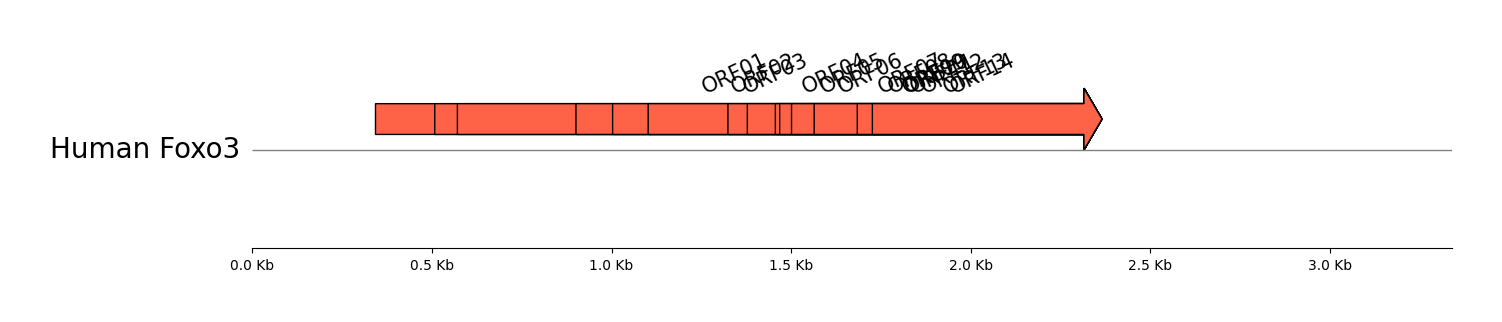

In [ ]:
dna_nucleotides = ['A', 'T', 'G', 'C', 'N'] #some GenBank accession numbers may contain DNA sequences with "N" letters which could be anything from A, T, G, C

complement_dict = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'} #complementary bases

DNA_Codons = {
    # 'M' - START, '_' - STOP
    "GCT": "A", "GCC": "A", "GCA": "A", "GCG": "A",
    "TGT": "C", "TGC": "C",
    "GAT": "D", "GAC": "D",
    "GAA": "E", "GAG": "E",
    "TTT": "F", "TTC": "F",
    "GGT": "G", "GGC": "G", "GGA": "G", "GGG": "G",
    "CAT": "H", "CAC": "H",
    "ATA": "I", "ATT": "I", "ATC": "I",
    "AAA": "K", "AAG": "K",
    "TTA": "L", "TTG": "L", "CTT": "L", "CTC": "L", "CTA": "L", "CTG": "L",
    "ATG": "M",
    "AAT": "N", "AAC": "N",
    "CCT": "P", "CCC": "P", "CCA": "P", "CCG": "P",
    "CAA": "Q", "CAG": "Q",
    "CGT": "R", "CGC": "R", "CGA": "R", "CGG": "R", "AGA": "R", "AGG": "R",
    "TCT": "S", "TCC": "S", "TCA": "S", "TCG": "S", "AGT": "S", "AGC": "S",
    "ACT": "T", "ACC": "T", "ACA": "T", "ACG": "T",
    "GTT": "V", "GTC": "V", "GTA": "V", "GTG": "V",
    "TGG": "W",
    "TAT": "Y", "TAC": "Y",
    "TAA": "_", "TAG": "_", "TGA": "_"
    } #derived from codon table which specifies the protein amino acid to a codon sequence

class dna_sequence:
  """This is to define an object called dna_sequence."""
  def __init__(self, input_seq, label = 'No label'):
    """This function initializes the class dna_sequence with attributes input_seq (DNA sequence) and label which is set to a default string."""
    self.input_seq = input_seq.upper()
    self.seq_len = len(input_seq)
    self.label = label
    try:
      self.is_valid = self.__validate() #to validate the DNA sequence in the input.
      assert self.is_valid, f"Sequence contains invalid characters."
    except AssertionError as ex:
      print("Sequence contains invalid characters.")


  def get_seq_info(self):
    """This gives a one line description of the DNA sequence inputted by the user."""
    return f"The DNA sequence provided is {self.seq_len} bp long and is labelled {self.label}"

  def __validate(self):
    """This validates that the DNA sequence in input has characters defined in the list dna_nucleotides only."""
    return set(dna_nucleotides).issuperset(self.input_seq)

  def gc_percentage(self):
    """This is to calculate the GC content of the DNA."""
    return str(round((self.input_seq.count('C') + self.input_seq.count('G'))/ len(self.input_seq) * 100)) + "%"

  def seq_complement(self):
    """This retrieves the complementary sequence (3'-->5') of DNA as defined by the dictionary complement_dict indicating complementary bases for each of the four DNA bases."""
    return ''.join([complement_dict[base] for base in self.input_seq])

  def reverse_complement(self):
    """This method retrieves the reverse complementary sequence of DNA utilizing the dictionary complement_dict."""
    return ''.join([complement_dict[base] for base in self.input_seq[::-1]])

  def seq_transcription(self):
    """This method gives the mRNA transcript derived from the DNA."""
    return self.input_seq.replace('T', 'U')

  def seq_translation(self, init_pos= 0):
    """This uses the dictionary DNA_Codons to give a translated sequence from the input DNA.
        It takes an argument called init_pos that defines the initial position at which the DNA sequence is translated by this function which has a default value set to 0 (reading frame 1)."""
    return ''.join(DNA_Codons.get(self.input_seq[i:i+3], 'X') for i in range(init_pos, len(input_seq)-2, 3))

  def reading_frames(self):
    """Generates a list  of protein sequences called frames, from the given sequence in each reading frame.
        Reading frames are way of reading DNA sequences.
        At any time, a region in DNA has six reading frames, so this will return a list of six protein sequences derived from each of the the reading frames."""
    frames=[]
    frames.append(self.seq_translation(0))
    frames.append(self.seq_translation(1))
    frames.append(self.seq_translation(2))
    rev_seq = dna_sequence(self.reverse_complement())
    frames.append(rev_seq.seq_translation(0))
    frames.append(rev_seq.seq_translation(1))
    frames.append(rev_seq.seq_translation(2))
    del rev_seq
    return frames

  def orf_seqs(self, min_length = 600):
    """This generates a list of ORFs of a minimum length specified by the argument min_length set to 600 as default."""
    start_codons = ['ATG']
    stop_codons = ['TAA', 'TAG', 'TGA']
    global listOfOrf
    listOfOrf = []
    for i in range(3): #looping all the frames
      for start in range(i, len(self.input_seq)-2, 3):
          if self.input_seq[start:start+3] in start_codons:
            for stop in range(start+3, len(self.input_seq)-2, 3):
              if self.input_seq[stop:stop +3] in stop_codons:
                orf = self.input_seq[start:stop+3]
                if len(orf) >= min_length:
                  listOfOrf.append(orf)
                break
            else:
              orf = self.input_seq[start:]
              if len(orf) >= min_length:
                listOfOrf.append(orf)
    return len(listOfOrf)

  def orf_translate(self):
    """Translates the ORF sequences identified above into protein sequences."""
    orf_proteins = []
    for orf in listOfOrf:
      orf_proteins.append(''.join([DNA_Codons.get(orf[i:i+3], 'X') for i in range(0, len(orf)-2, 3)]))
    return orf_proteins

  def orf_pos_finder(self):
    """Creates a list of tuples containing the start and end positions of the ORF sequences identified in previous methods."""
    global orfs
    orfs = []
    for orf_seq in listOfOrf:
      start = self.input_seq.find(orf_seq)
      if start != -1:
        end = start + len(orf_seq)
        orfs.append((start,end))
    return orfs

  def orf_visualizer(self):
    """This method utilizes the pyGenomeViz package to visualize the position of ORFs determined previously on a stretch of DNA sequence."""
    name = self.label
    seq_size = self.seq_len
    orfs_pos = orfs
    gv = GenomeViz(fig_width=12, fig_track_height=0.8, tick_track_ratio=0.3, tick_style="axis", align_type= 'center', tick_labelsize= 10)
    track = gv.add_feature_track(name, seq_size, labelsize=20)
    for idx, orfp in enumerate(orfs_pos,1):
      start, end = orfp
      track.add_feature(start, end, label= f"ORF{idx:02d}", linewidth=1, labelrotation=25, labelvpos="top", labelhpos="center", labelha="center", plotstyle="arrow", facecolor="tomato")

    return gv.savefig("ORFs.png")

  def kmer_count(self, k= 4):
    """This counts the number of kmers of a specified length k in the DNA sequence. Default k-mer length is set to 4."""
    return len(list(self.input_seq[a:a+k] for a in range(len(self.input_seq) - k)))

Entrez.email ='emrunali@gmail.com'
input_type = input("Enter 'S' for DNA sequence or 'A' for GenBank accession number: ") #allows the user to enter either a DNA sequence or the GenBank accession number as input
if input_type.upper() == "S":
    input_seq = input("Enter DNA sequence: ")
elif input_type.upper() == "A":
    accession = input("Enter GenBank accession number: ")
    try: #to extract the DNA sequence from a GenBank ID using the Biopython library modules Entrez and SeqIO
        handle = Entrez.efetch(db= 'nucleotide', id = accession, rettype = 'fasta', retmode = 'text')
        record = SeqIO.read(handle, "fasta")
        input_seq = str(record.seq)
    except Exception as e:
        print("Error retrieving sequence data:", e)
else:
    print("Invalid input type.")


label_ID = input("Enter a label for this sequence:")
dna = dna_sequence(input_seq, label_ID)
print(dna.get_seq_info())
print("GC% of the DNA: " + dna.gc_percentage())
print("Sequence complement: " + dna.seq_complement())
print("Reverse complement: " + dna.reverse_complement())
print("Sequence transcription: " + dna.seq_transcription())
print("Sequence translation: " + dna.seq_translation())
print("Six reading frames: " + str(dna.reading_frames()))
print("No. of ORFs of specified minimum length: " + str(dna.orf_seqs()))
print("Respective positions of ORFs in the given sequence in the format (start, stop): " + str(dna.orf_pos_finder()))
print("k-mers of specified length: " + str(dna.kmer_count(5)))
dna.orf_visualizer()